In [1]:
import matplotlib.pyplot as plt
#set default figure size to 15,4
plt.rcParams['figure.figsize'] = [15, 4]

In [2]:
#set pandas column width and columns count to None
import pandas as pd
pd.set_option('display.max_columns', None) # don't hide columns
pd.set_option('display.max_colwidth', 200) # don't truncate column content

In [3]:
#load tematy_i_opisy.pickle from data_acquisition-data folder
import pickle
with open('./data_acquisition-data/tematy_i_opisy_df.pickle', 'rb') as f:
    tematy_i_opisy = pickle.load(f)
tematy_i_opisy.sample(1)

,Tytuł pracy w języku oryginału,Temat Pracy,Jednostka organizacyjna,Osoba zgłaszająca temat,Kierunki studiów,Typ pracy,Status tematu,Data aktualizacji,url
3861,Ocena złączy spawanych metodami badań nieniszczących i niszczących według obowiązujących norm,"W pracy zostanie przeprowadzona analiza jakości złącza spawanego metodami nieniszczącymi (tj. np. MT, UT, PT, RT) nieszczącymi (próba jednoosiowego rozciągania, HV) oraz analiza mikrostrukturalna ...",[110-000] Wydział Inżynierii Metali i Informatyki Przemysłowej,Marcin Kwiecień,inżynieria materiałowa,magisterska,Zarezerwowany,3 sierpnia 2022,https://apd.usos.agh.edu.pl/topics/show/5817/


In [4]:
# this was to check if '\n' is literally in the data, or if the new line character is displayed like that in pandas Dataframe
# indexes=[1135,4876,3232]
# print(tematy_i_opisy.loc[indexes])
# turns out there is no '\' then 'n' in the data 

In [5]:
#show nan values
tematy_i_opisy.isna().sum()

Tytuł pracy w języku oryginału    0
Temat Pracy                       0
Jednostka organizacyjna           0
Osoba zgłaszająca temat           0
Kierunki studiów                  0
Typ pracy                         0
Status tematu                     0
Data aktualizacji                 0
url                               0
dtype: int64

In [6]:
def hist_first_bar_different_color(data, dims=(15,4), bins=10, color='red'):
    fig, ax = plt.subplots()
    fig.set_size_inches(dims)
    n,bins,patches =ax.hist(data, bins=bins)
    patches[0].set_facecolor(color)
    plt.show()

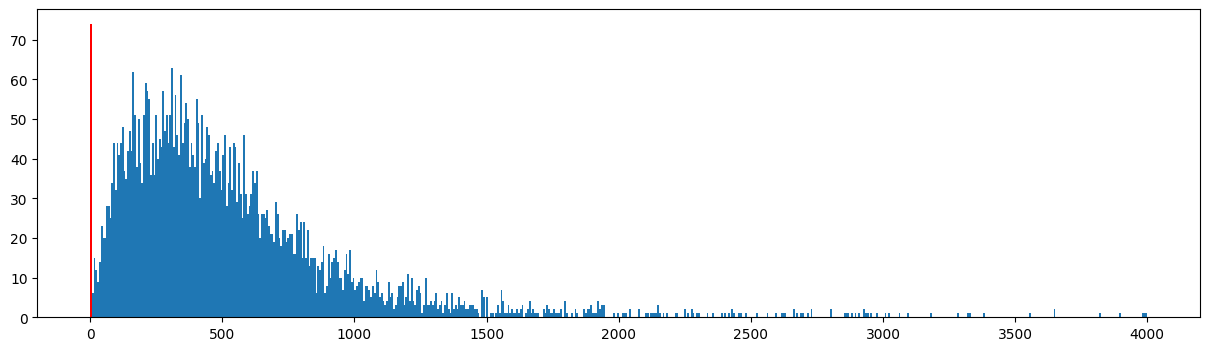

In [7]:
# count Temat Pracy string lenght and make barplot
import matplotlib.pyplot as plt
hist_first_bar_different_color(tematy_i_opisy['Temat Pracy'].str.len(), bins=600, color='red')

In [12]:
opis_lenght_to_count = {}
for x in range(0,10):
    opis_lenght_to_count[x] = len(tematy_i_opisy[tematy_i_opisy["Temat Pracy"].str.len()==x])
print(opis_lenght_to_count)

{0: 9, 1: 56, 2: 0, 3: 6, 4: 0, 5: 2, 6: 1, 7: 1, 8: 0, 9: 0}


In [25]:
#print sample of Temat Pracy where lenght is 5 and when lenght is 200
print(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == 5].sample(1)['Temat Pracy'].values[0])
print(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == 170].sample(1)['Temat Pracy'].values[0])

.....
Badania wpływ materiału (różne materiały z jakich wykonano głowice drukującą) i parametrów pracy głowicy (temperatura i kierunek druku) na własności uzyskanego wydruku 3D


In [14]:
def get_rows_with_column_lenght_in_range(data,column,range_start,range_end):
    return data[(data[column].str.len()>=range_start) & (data[column].str.len()<range_end)]

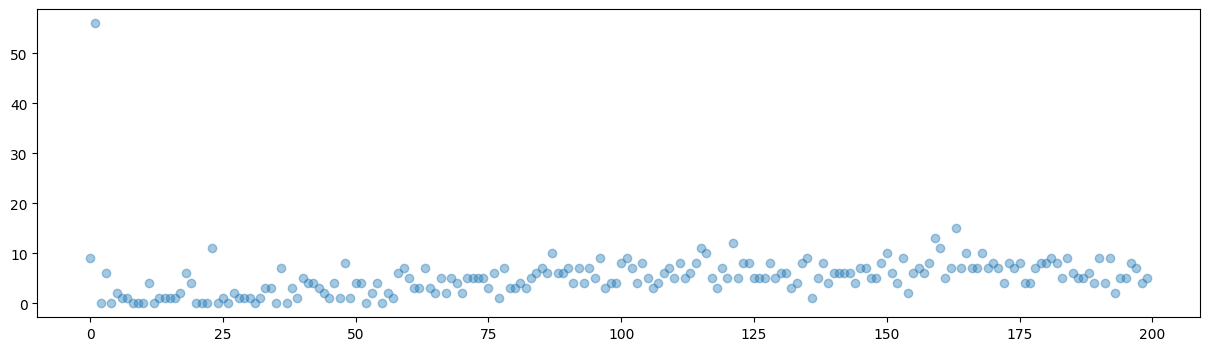

In [15]:
# lenghts = [len(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() == x]) for x in range(0,200)]
lenghts = [len(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',x,x+1)) for x in range(0,200)]
plt.plot(lenghts, 'o',alpha=0.4)

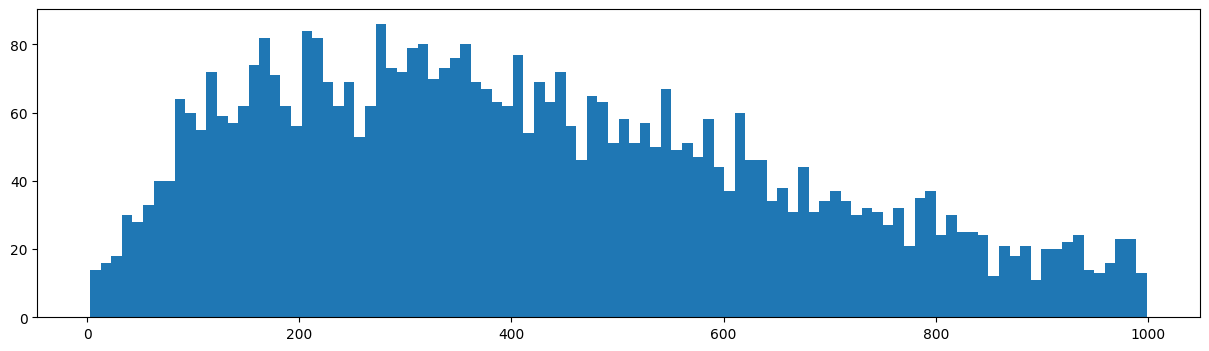

In [16]:
# plt.hist(tematy_i_opisy[tematy_i_opisy['Temat Pracy'].str.len() > 2][tematy_i_opisy['Temat Pracy'].str.len() < 1000]['Temat Pracy'].str.len(), bins=100)
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,1000)['Temat Pracy'].str.len(), bins=100)
plt.show()

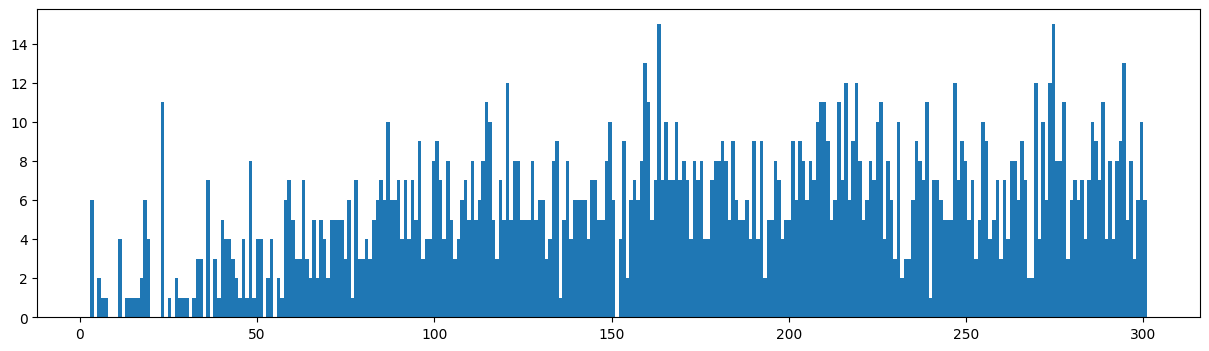

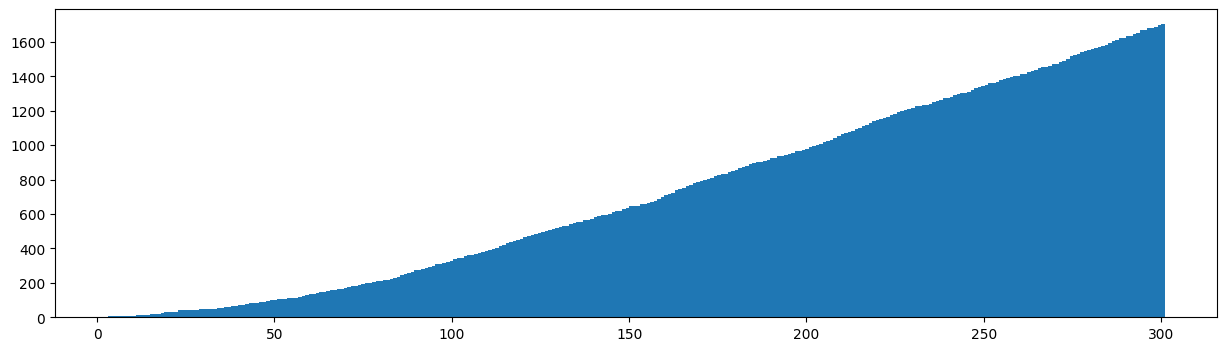

In [17]:
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,302)['Temat Pracy'].str.len(), bins=300)
plt.show()
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,302)['Temat Pracy'].str.len(), bins=300, cumulative=True)
plt.show()

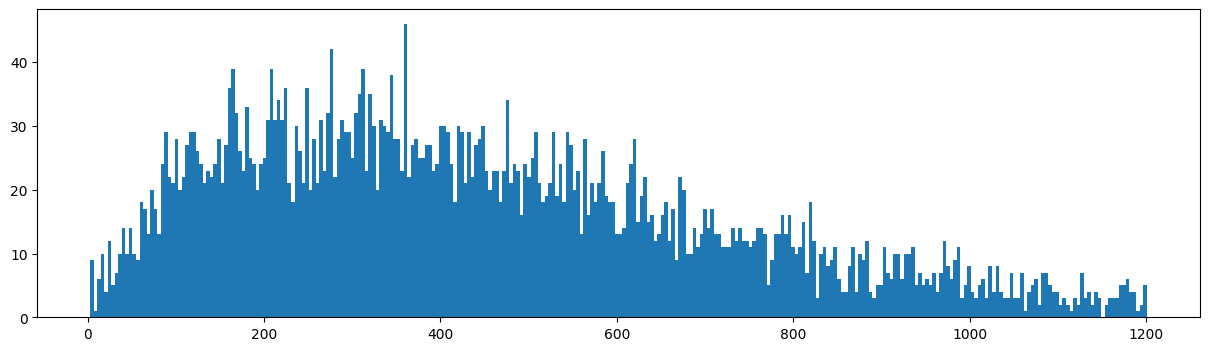

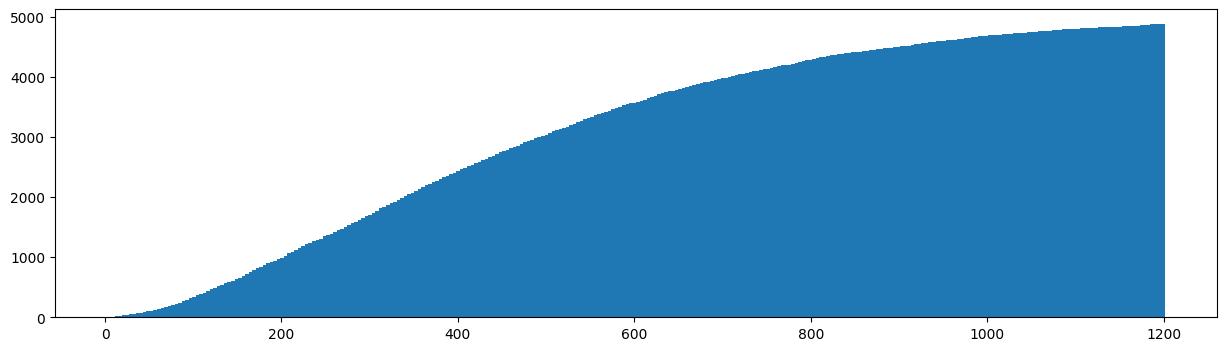

In [18]:
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,1202)['Temat Pracy'].str.len(), bins=300)
plt.show()
plt.hist(get_rows_with_column_lenght_in_range(tematy_i_opisy,'Temat Pracy',2,1202)['Temat Pracy'].str.len(), bins=300, cumulative=True)
plt.show()